# Generating model for online regression prediction

Goal: predicting hospital charges based on person's characteristics

In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import plotly.express as px
from pycaret.regression import *

In [4]:
data = pd.read_csv("insurance.csv",index_col=False)
#data = data.loc[:,['date','y']]
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Creating experiment with Pycaret

In [5]:
r2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True,
               bin_numeric_features= ['age', 'bmi'])
#lr = create_model('lightgbm')

In [6]:
best = r2.compare_models(n_select=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:14:03
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [10]:
#plot_model(best)
best_tuned_models = [tune_model(model) for model in best]

#plot_model(best_tuned)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:25:08
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3036.8229,21795853.9845,4668.6030,0.8698,0.3981,0.3135
1,3348.7346,32550477.2189,5705.3026,0.8107,0.4377,0.3021
2,3080.2499,23240684.2758,4820.8593,0.7057,0.5037,0.3782
3,2898.0848,20401718.6545,4516.8262,0.8296,0.4394,0.3701
4,3180.9365,28357311.7058,5325.1584,0.7891,0.5191,0.2992
5,3087.2990,23879580.9238,4886.6738,0.8464,0.3800,0.2965
6,2753.6129,21900877.3434,4679.8373,0.8510,0.3686,0.2913
7,3388.9945,29581708.8450,5438.9070,0.8373,0.4520,0.2879
8,3277.8110,25196169.0940,5019.5786,0.8373,0.4074,0.3470


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:27:29
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3034.4302,21879976.5781,4677.6037,0.8693,0.3975,0.3129
1,3300.5646,32341927.0806,5686.9963,0.8120,0.4322,0.2934
2,3051.7872,22928100.2050,4788.3296,0.7097,0.4941,0.3720
3,2826.8058,19647595.0996,4432.5608,0.8359,0.4990,0.3597
4,3155.1250,28365712.6366,5325.9471,0.7890,0.4973,0.2937
5,3078.7002,23867165.3243,4885.4033,0.8465,0.3793,0.2977
6,2758.5557,22238431.9886,4715.7642,0.8487,0.3649,0.2878
7,3381.8512,29544542.8076,5435.4892,0.8375,0.4514,0.2847
8,3236.2408,25023325.2393,5002.3320,0.8384,0.4000,0.3359


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[GradientBoostingRegressor(random_state=123),
 Ridge(random_state=123),
 Lasso(alpha=8.84, random_state=123)]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2521.6623,19126423.5805,4373.3767,0.8661,0.4126,0.3155


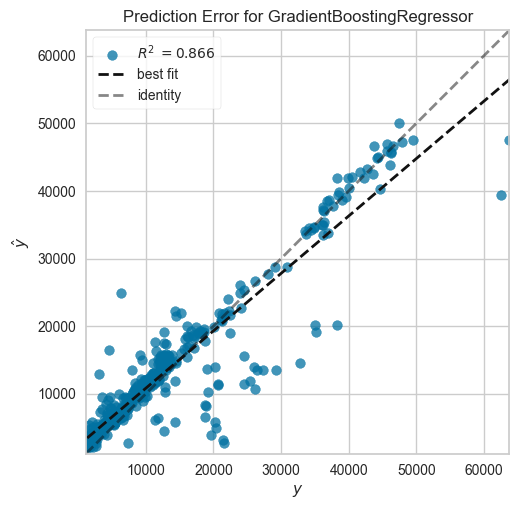

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2521.6623,19126423.5805,4373.3767,0.8661,0.4126,0.3155


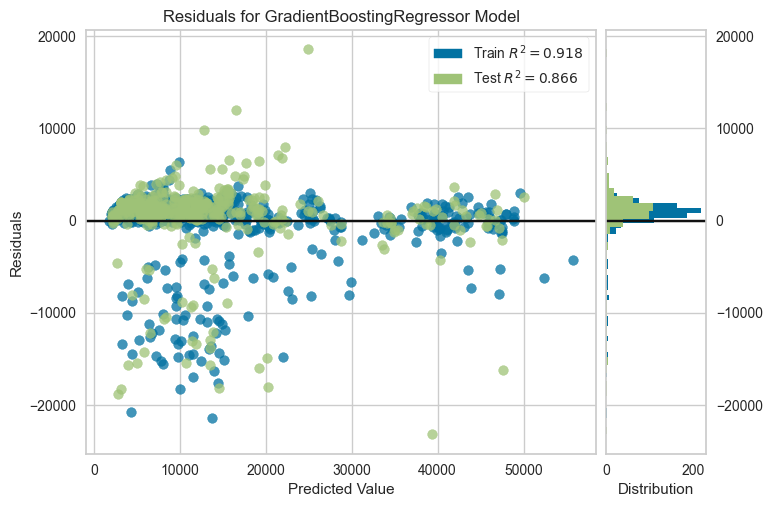

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2521.6623,19126423.5805,4373.3767,0.8661,0.4126,0.3155


GradientBoostingRegressor(random_state=123)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,2824.8877,20182438.7027,4492.4869,0.8587,0.3895,0.3053


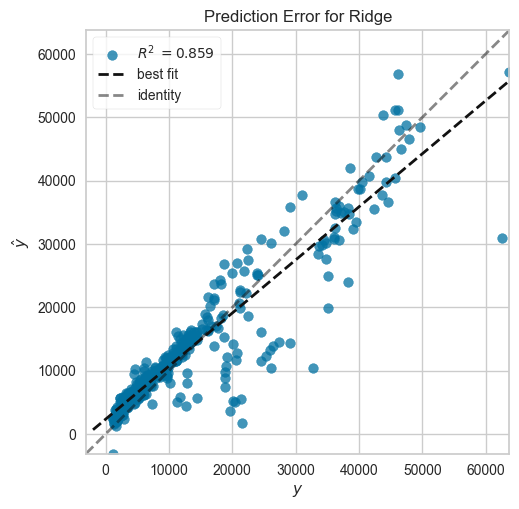

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,2824.8877,20182438.7027,4492.4869,0.8587,0.3895,0.3053


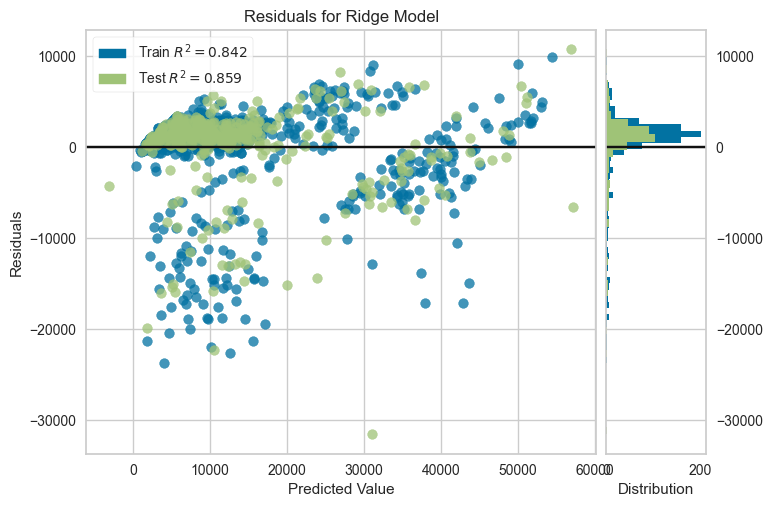

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,2824.8877,20182438.7027,4492.4869,0.8587,0.3895,0.3053


Ridge(random_state=123)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,2802.2976,19987696.2698,4470.7601,0.8601,0.3791,0.2991


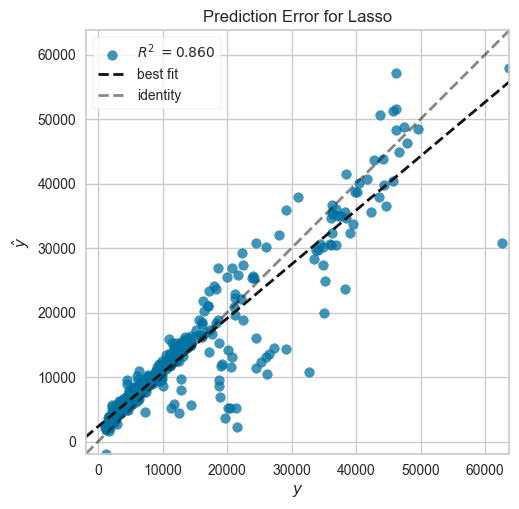

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,2802.2976,19987696.2698,4470.7601,0.8601,0.3791,0.2991


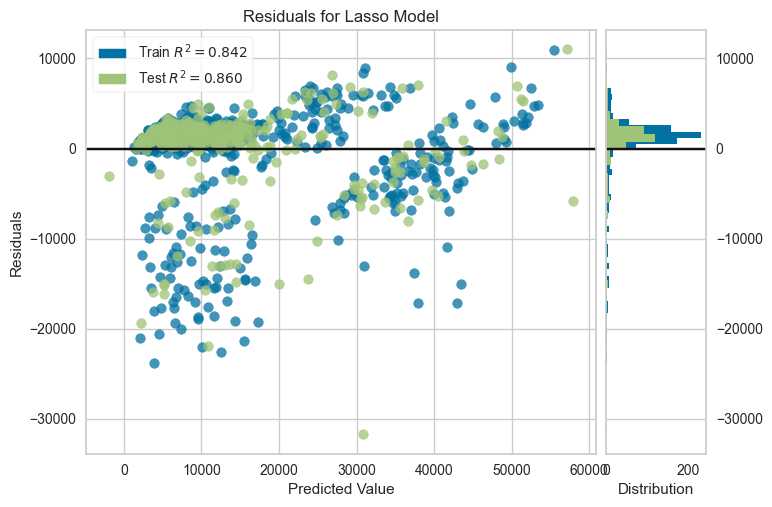

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,2802.2976,19987696.2698,4470.7601,0.8601,0.3791,0.2991


Lasso(alpha=8.84, random_state=123)


In [11]:
for i in range(0,3):
    plot_model(best_tuned_models[i], plot='error')
    plot_model(best_tuned_models[i])
    predict_model(best_tuned_models[i])
    print(best_tuned_models[i])

## Saving best (tuned) model for deployment

In [15]:
save_model(best_tuned_models[0], model_name = 'hospital_charges_v1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\rafae\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerW...
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['age', 'bmi'],
                                     transformer=KBinsDiscretizer(encode='ordinal',
                                                                  strategy='kmeans'))),
                 ('normalize', TransformerWrapper(tran